In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [39]:
df = pd.read_csv('deliveries.csv')

In [40]:
df.shape

(136598, 21)

In [41]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [42]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [43]:
df.drop(columns=['batsman', 'non_striker', 'bowler', 'player_dismissed', 'dismissal_kind', 'fielder'], inplace=True)

In [44]:
df.isna().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [45]:
# label = LabelEncoder()
# df['batting_team'] = label.fit_transform(df['batting_team'])

In [46]:
# label = LabelEncoder()
# df['bowling_team'] = label.fit_transform(df['bowling_team'])

In [47]:
batting_team = pd.get_dummies(df['batting_team'], prefix='bat')

In [50]:
bowling_team = pd.get_dummies(df['bowling_team'], prefix='bowl')

In [51]:
df = df.join(batting_team).join(bowling_team)

In [52]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs',
       'bat_Chennai Super Kings', 'bat_Deccan Chargers',
       'bat_Delhi Daredevils', 'bat_Gujarat Lions', 'bat_Kings XI Punjab',
       'bat_Kochi Tuskers Kerala', 'bat_Kolkata Knight Riders',
       'bat_Mumbai Indians', 'bat_Pune Warriors', 'bat_Rajasthan Royals',
       'bat_Rising Pune Supergiants', 'bat_Royal Challengers Bangalore',
       'bat_Sunrisers Hyderabad', 'bowl_Chennai Super Kings',
       'bowl_Deccan Chargers', 'bowl_Delhi Daredevils', 'bowl_Gujarat Lions',
       'bowl_Kings XI Punjab', 'bowl_Kochi Tuskers Kerala',
       'bowl_Kolkata Knight Riders', 'bowl_Mumbai Indians',
       'bowl_Pune Warriors', 'bowl_Rajasthan Royals',
       'bowl_Rising Pune Supergiants', 'bowl_Royal Challengers Bangalore',
       'bowl_Sunrisers Hyderabad'],
      dty

In [53]:
df.shape

(136598, 41)

In [61]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,...,bowl_Gujarat Lions,bowl_Kings XI Punjab,bowl_Kochi Tuskers Kerala,bowl_Kolkata Knight Riders,bowl_Mumbai Indians,bowl_Pune Warriors,bowl_Rajasthan Royals,bowl_Rising Pune Supergiants,bowl_Royal Challengers Bangalore,bowl_Sunrisers Hyderabad
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [54]:
y = df['batsman_runs']

In [55]:
df.drop(columns=['batsman_runs'], inplace=True)

In [62]:
df.drop(columns=['batting_team', 'bowling_team'], inplace=True)

In [63]:
X = df

In [64]:
X.shape

(136598, 38)

In [65]:
y.shape

(136598,)

In [72]:
pd.unique(y)

array([0, 4, 6, 1, 2, 5, 3], dtype=int64)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [73]:
tree_clf = DecisionTreeClassifier(criterion='entropy')
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [93]:
x_train.shape

(102448, 38)

In [94]:
x_test.shape

(34150, 38)

In [75]:
y_pred = tree_clf.predict(x_test)

In [76]:
accuracy_score(y_pred, y_test)

0.9999707174231333

In [77]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

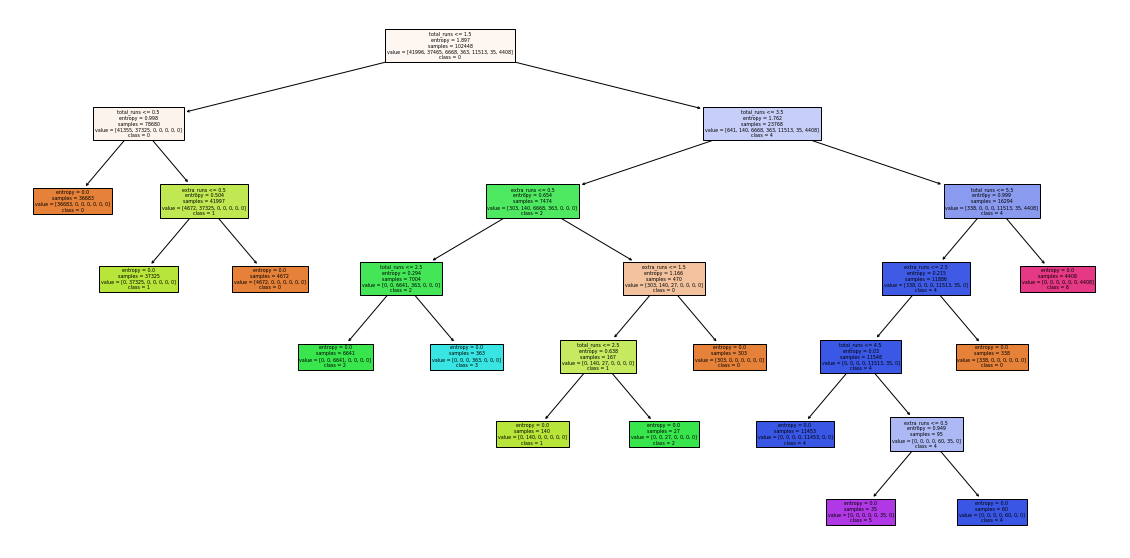

In [79]:
plt.figure(figsize=(20,10))
features = X.columns
classes = ['0','1','2','3','4','5','6']
tree.plot_tree(tree_clf, feature_names=features, class_names=classes, filled=True)
plt.show()

In [80]:
# Minimal cost complexity Pruning

In [81]:
path = tree_clf.cost_complexity_pruning_path(x_train, y_train)

In [82]:
path

{'ccp_alphas': array([0.        , 0.00088043, 0.0010405 , 0.00246986, 0.0043066 ,
        0.02010724, 0.02163665, 0.02224202, 0.13395261, 0.20215138,
        0.20646899, 0.56007635, 0.72178512]),
 'impurities': array([0.00000000e+00, 8.80426572e-04, 1.92092548e-03, 4.39078649e-03,
        8.69738721e-03, 2.88046274e-02, 5.04412767e-02, 7.26833000e-02,
        2.06635913e-01, 4.08787294e-01, 6.15256281e-01, 1.17533263e+00,
        1.89711775e+00])}

In [83]:
alphas = path['ccp_alphas']

In [101]:
train_acc = []
test_acc = []

for i in range(len(alphas)):
    tree_clf = DecisionTreeClassifier(criterion='gini', ccp_alpha=alphas[i])
    tree_clf.fit(x_train, y_train)
    
    ytrain_pred = tree_clf.predict(x_train)
    train_acc.append(accuracy_score(y_train, ytrain_pred))
    
    ytest_pred = tree_clf.predict(x_test)
    test_acc.append(accuracy_score(y_test, ytest_pred))

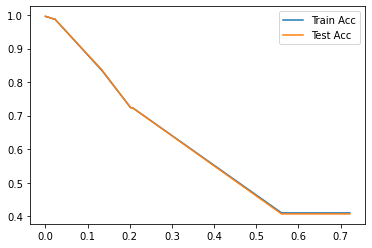

In [102]:
import numpy as np


sns.lineplot(y=train_acc, x = alphas, label='Train Acc')
sns.lineplot(y=test_acc, x = alphas, label='Test Acc')
plt.legend()
plt.show()

In [97]:
train_acc

[1.0,
 0.9993948149305013,
 0.9993948149305013,
 0.9980282679993753,
 0.9980282679993753,
 0.9882281742933,
 0.9882281742933,
 0.9882281742933,
 0.8347747149773543,
 0.7237622989223801,
 0.7237622989223801,
 0.40992503513977824,
 0.40992503513977824]

In [98]:
test_acc

[0.9999707174231333,
 0.9996778916544656,
 0.9996778916544656,
 0.9980380673499268,
 0.9980380673499268,
 0.988316251830161,
 0.988316251830161,
 0.988316251830161,
 0.8365446559297218,
 0.7237481698389459,
 0.7237481698389459,
 0.40693997071742316,
 0.40693997071742316]

In [116]:
tree_clf = DecisionTreeClassifier(criterion='gini', ccp_alpha=alphas[8])
tree_clf.fit(x_train, y_train)

ytest_pred = tree_clf.predict(x_test)
print(accuracy_score(y_test, ytest_pred))

0.8365446559297218


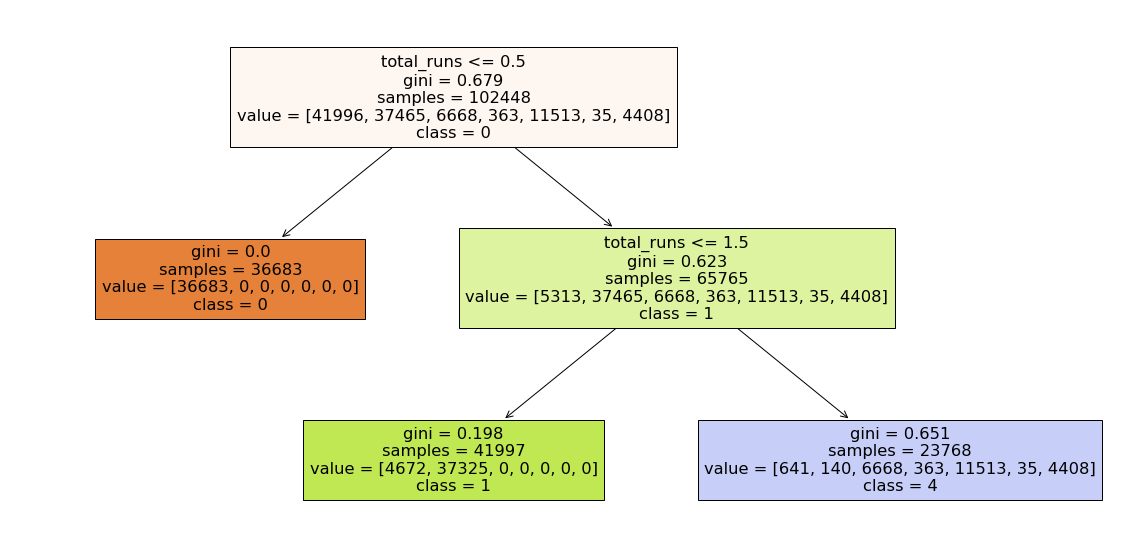

In [117]:
plt.figure(figsize=(20,10))
features = X.columns
classes = ['0','1','2','3','4','5','6']
tree.plot_tree(tree_clf, feature_names=features, class_names=classes, filled=True)
plt.show()